<a href="https://colab.research.google.com/github/rishivanshi01/repos/blob/main/Stock_Market_Prediction_of_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING MODULES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import *
import numpy as np

In [ ]:
#READING CSV FILE
google = pd.read_csv("/content/Google_train_data[1].csv")
google.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
#DATA EXPLORATION AND CLEANING
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
google['Date']=pd.to_datetime(google['Date'])

In [ ]:
print("Dateframe between contains stock price between%s and %s"%(google['Date'].max(),google['Date'].min()))

Dateframe between contains stock price between2016-12-30 00:00:00 and 2012-01-03 00:00:00


In [ ]:
print("Total days = %s "%(google['Date'].max() - google['Date'].min()))

Total days = 1823 days 00:00:00 


In [ ]:
google["Close"]=pd.to_numeric(google.Close,errors='coerce')
google = google.dropna()
trainData = google.iloc[:,4:5].values

In [ ]:
google.describe()

,Open,High,Low,Close
count,1149.000000,1149.000000,1149.000000,1149.000000
mean,531.604517,535.816449,526.879608,674.775527
std,158.412156,159.593385,157.008123,112.582696
min,279.120000,281.210000,277.220000,491.200000
25%,391.560000,394.700000,388.230000,571.580000
50%,536.350000,539.600000,531.540000,673.690000
75%,689.980000,698.200000,683.650000,761.680000
max,816.680000,816.680000,805.140000,922.160000


In [ ]:
google.tail()

,Date,Open,High,Low,Close,Volume
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300"
1257,2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 26s - loss: 0.0332 - 26s/epoch - 736ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0114 - 7s/epoch - 209ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0129 - 8s/epoch - 223ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0091 - 7s/epoch - 191ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0069 - 8s/epoch - 224ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0066 - 7s/epoch - 190ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0071 - 8s/epoch - 224ms/step
Epoch 8/20
35/35 - 8s - loss: 0.0077 - 8s/epoch - 219ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0071 - 7s/epoch - 194ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0055 - 8s/epoch - 241ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0066 - 7s/epoch - 211ms/step
Epoch 12/20
35/35 - 10s - loss: 0.0065 - 10s/epoch - 272ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0067 - 8s/epoch - 215ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0060 - 7s/epoch - 201ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0072 - 8s/epoch - 223ms/step
Epoch 16/20
35/35 - 8s - loss: 0.0076 - 8s/epoch - 231ms/step
Epoch 17/20
3

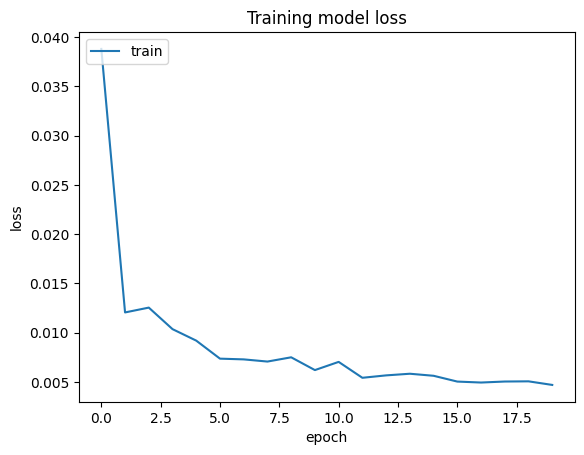

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('/Google_test_data[1].csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 64ms/step


array([[1.2667434],
       [1.2701443],
       [1.2815956],
       [1.2987132],
       [1.3134023],
       [1.3156663],
       [1.3048158],
       [1.2875617],
       [1.274704 ],
       [1.2694645],
       [1.2620076],
       [1.2509279],
       [1.2406785],
       [1.231099 ],
       [1.2281606],
       [1.23179  ],
       [1.2485398],
       [1.27606  ],
       [1.3086116],
       [1.3416506],
       [1.3577039],
       [1.3575804],
       [1.3396685],
       [1.3111467],
       [1.2832038],
       [1.2649648],
       [1.2581275],
       [1.2560856],
       [1.2494751],
       [1.2396142],
       [1.2282848],
       [1.2151152],
       [1.1955847],
       [1.1710888],
       [1.1593556],
       [1.16632  ],
       [1.1867635],
       [1.2121347],
       [1.2373989],
       [1.2522402],
       [1.2659616],
       [1.2811021],
       [1.2980918],
       [1.3140678],
       [1.3253163],
       [1.3275915],
       [1.3188568],
       [1.3095255],
       [1.3053863],
       [1.3090835],


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

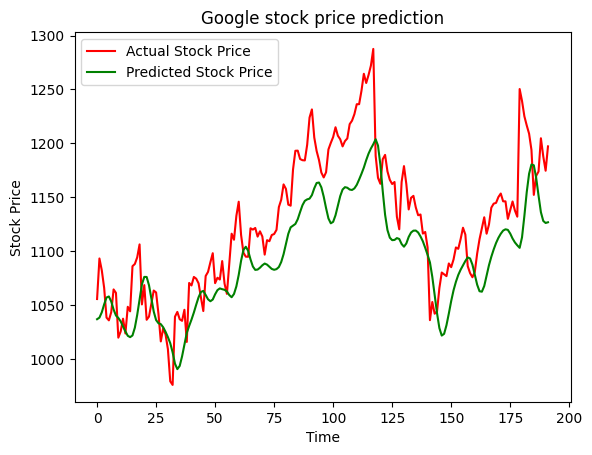

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()